<a href="https://colab.research.google.com/github/SafiyyahKazim/Google-COLAB/blob/master/unemployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What's the timeframe?
Which regions have the higest initial claims per year?
Which years have the highest initial claims?
Using linear regression, forecase future initial claims.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
plt.figsize=(16, 16)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset_diabetes/Unemployment_Insurance_Initial_Claims_By_Region_By_Month__Beginning_2003.csv')

In [ ]:
df.head()

,Period Ending,Region,Initial Claims
0,07/31/2003,Capital,4326
1,07/31/2003,Central New York,4366
2,07/31/2003,Finger Lakes,7095
3,07/31/2003,Hudson Valley,8454
4,07/31/2003,Long Island,13575


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Period Ending   2100 non-null   object
 1   Region          2100 non-null   object
 2   Initial Claims  2100 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 49.3+ KB


In [ ]:
df['Period Ending'] = pd.to_datetime(df['Period Ending'])


In [ ]:
min(df['Period Ending'])

Timestamp('2003-07-31 00:00:00')

In [ ]:
max(df['Period Ending'])

Timestamp('2020-12-31 00:00:00')

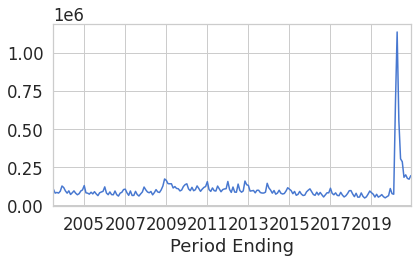

In [ ]:
df.groupby('Period Ending').sum()['Initial Claims'].plot()
plt.tight_layout()

Text(0.5, 1.0, 'Claims Over Time')

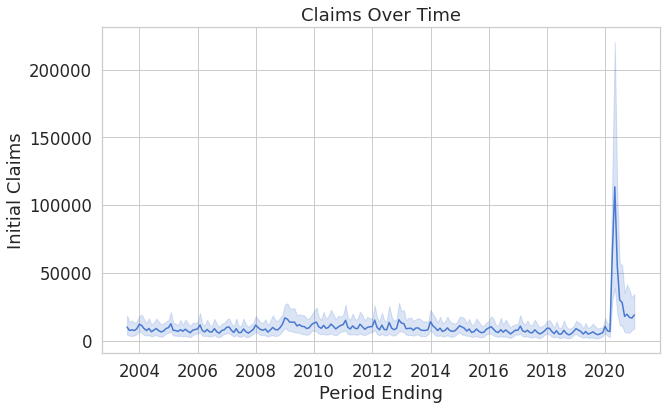

In [ ]:
plt.figure(figsize = (10,6))

sns.lineplot(data = df, x = 'Period Ending', y = 'Initial Claims' ).set_title('Claims Over Time')

In [ ]:
df['Period Ending'] = pd.to_datetime(df['Period Ending'])
df['Day'] = df['Period Ending'].apply(lambda time: time.day)
df['Month'] = df['Period Ending'].apply(lambda time: time.month)
df['Year'] = df['Period Ending'].apply(lambda time: time.year)

In [ ]:
df2014 = df[df['Year'] == 2014]
region_df = df2014.groupby(['Region']).agg({'Initial Claims': sum})
print(region_df)

                  Initial Claims
Region                          
Capital                    56729
Central New York           47755
Finger Lakes               76581
Hudson Valley             105478
Long Island               151695
Mohawk Valley              33608
New York City             427069
North Country              31023
Southern Tier              36075
Western New York          104630


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

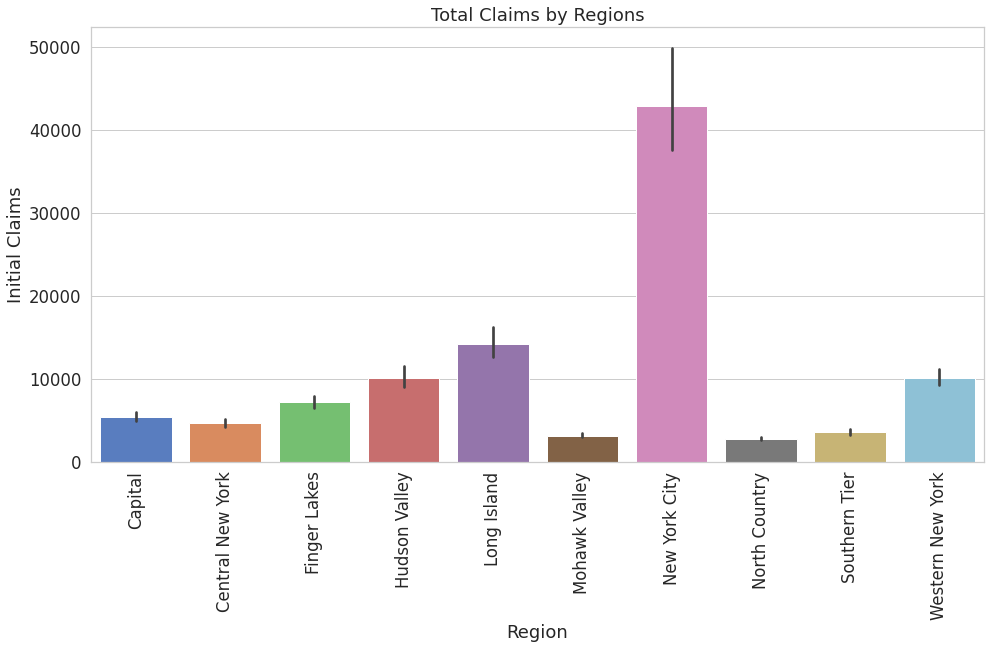

In [ ]:
plt.figure(figsize = (16,8))

sns.barplot(data = df, x = 'Region', y = 'Initial Claims').set_title('Total Claims by Regions')
plt.xticks(rotation = 90)

In [ ]:
newYorkData1 = df[df['Region'] == 'New York City']
newYorkData1['year'] = pd.DatetimeIndex(newYorkData1['Period Ending']).year
newYorkData1.drop(newYorkData1[newYorkData1['year'] >= 2020].index, inplace = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
newYorkData1['Ordinal_date'] = newYorkData1['Period Ending'].apply(lambda x: x.toordinal())


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


[datetime.date(2002, 5, 30), datetime.date(2005, 2, 23), datetime.date(2007, 11, 20), datetime.date(2010, 8, 16), datetime.date(2013, 5, 12), datetime.date(2016, 2, 6), datetime.date(2018, 11, 2), datetime.date(2021, 7, 29)]


[Text(0, 0, '2002-05-30'),
 Text(0, 0, '2005-02-23'),
 Text(0, 0, '2007-11-20'),
 Text(0, 0, '2010-08-16'),
 Text(0, 0, '2013-05-12'),
 Text(0, 0, '2016-02-06'),
 Text(0, 0, '2018-11-02'),
 Text(0, 0, '2021-07-29')]

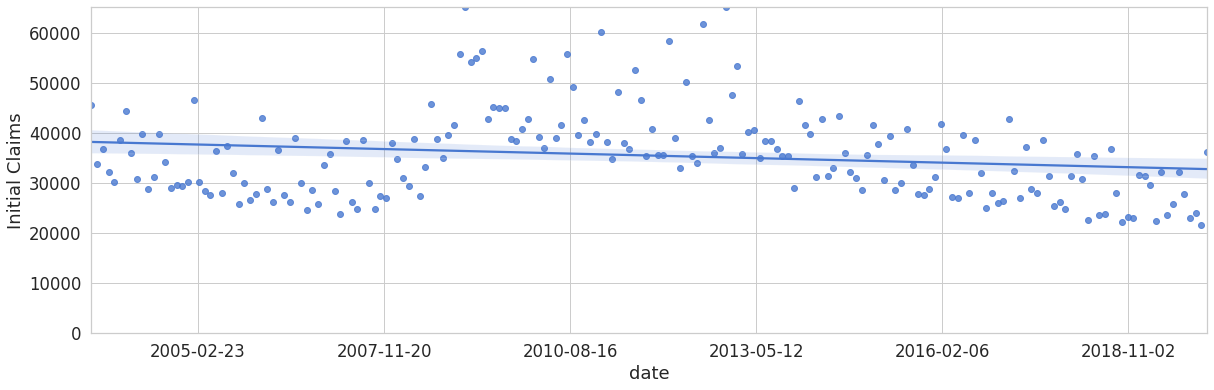

In [ ]:
import datetime
plt.figure(figsize = (20,6))
ax = sns.regplot(
    data=newYorkData1,
    x='Ordinal_date',
    y='Initial Claims',
)
# Tighten up the axes for prettiness
ax.set_xlim(newYorkData1['Ordinal_date'].min() - 1, newYorkData1['Ordinal_date'].max() + 1)
ax.set_ylim(0, newYorkData1['Initial Claims'].max() + 1)
ax.set_xlabel('date')
new_labels = [datetime.date.fromordinal(int(item)) for item in ax.get_xticks()]
print(new_labels)
ax.set_xticklabels(new_labels)